# Tips data set sandbox 

This is my sandbox for experimenting with the data set and for testing ideas. 
> Author: Andrzej Kocielski, 2019

---

## Importing packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As the Tips data set comes with the Seaborn package, I am going to call it up and assign to variable `tips`.

In [2]:
# Loading the data set
tips = sns.load_dataset("tips")

## A quick insight into the data set.

In [3]:
# General shape of the data set (number of raws - observations, and columns - categories):
tips.shape

(244, 7)

In [4]:
# First several raws of the data set:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Several last raws of the data set:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Here will come description of the data in each column - what is the data type (int, float, string, etc.), give number of variants and possibly list them, etc 


...
...
...

Let's look at the essential statistics of the entire data set, using `.describe()` method.

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Here will come narrative desciption of the above. For example, note that only numerical columns were considered.

In [7]:
type(tips)

pandas.core.frame.DataFrame

In [8]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [9]:
df = np.array(tips)

In [10]:
type(df)

numpy.ndarray

## Data set modeling

In [11]:
# add column: tph - tip per head
tph = tips["tip"]/tips["size"]
tips["tph"] = tph
print(tips["tph"].describe())
# check what is the mean 'tph' value for smokers and non-smokers
# example (from https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/):
# gapminder_2002 = gapminder[gapminder['year']==2002]
print("Tip per head: ", tips["tph"].mean())
# mean tip per smoker head
#print((tips[tips["smoker"] == "Yes"]).head())
print("Bill per smoker head: ", tips[tips["smoker"] == "Yes"]["tph"].mean())

count    244.000000
mean       1.212762
std        0.491705
min        0.400000
25%        0.862500
50%        1.107500
75%        1.500000
max        3.333333
Name: tph, dtype: float64
Tip per head:  1.2127616120218587
Bill per smoker head:  1.2977956989247312


In [12]:
# new column created - sum of total bill and tip
tips["sum"] = tips["total_bill"]+tips["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
tips["tip_ratio"] = tips["tip"]/tips["sum"] 

# add column: bpp - bill per person
tips["bpp"] = tips["total_bill"]/tips["size"]

# add column: tpp - tip per person
tips["tpp"] = tips["tip"]/tips["size"]


In [13]:
# mean tip per smoker head
#print("Bill per smoker head: ", tips[tips["smoker"] == "Yes"]["tpp"].mean())

tips[tips["smoker"] == "Yes"]["tpp"]
#tips[tips["smoker"] == "Yes"]["sum"]

56     0.750
58     0.880
60     1.605
61     1.000
62     0.990
       ...  
234    1.500
236    0.500
237    0.585
240    1.000
241    1.000
Name: tpp, Length: 93, dtype: float64

In [14]:
tips.tail(8)

,total_bill,tip,sex,smoker,day,time,size,tph,sum,tip_ratio,bpp,tpp
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.500000,13.60,0.073529,6.300000,0.500000
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.585000,34.00,0.034412,16.415000,0.585000
238,35.83,4.67,Female,No,Sat,Dinner,3,1.556667,40.50,0.115309,11.943333,1.556667
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333,34.95,0.169385,9.676667,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000,29.18,0.068540,13.590000,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000,24.67,0.081070,11.335000,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000,19.57,0.089423,8.910000,0.875000
243,18.78,3.00,Female,No,Thur,Dinner,2,1.500000,21.78,0.137741,9.390000,1.500000


In [39]:
tips["sum"] = tips["total_bill"]+tips["tip"]
tips["ratio"] = tips["tip"]/tips["sum"]
print(ratio.describe())
sns.regplot(x="total_bill", y="ratio", data=tips, marker='.')
# source: https://python-graph-gallery.com/41-control-marker-features/"

NameError: name 'ratio' is not defined

### Various plots

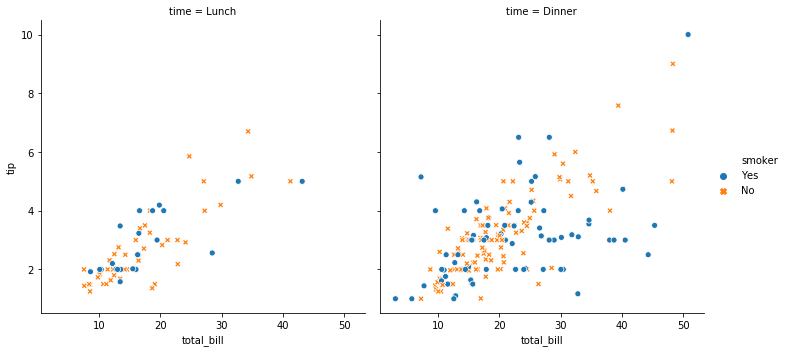

In [20]:
# https://seaborn.pydata.org/introduction.html
sns.relplot(x="total_bill", y="tip", col="time", hue="smoker", style="smoker", marker='.', data=tips)

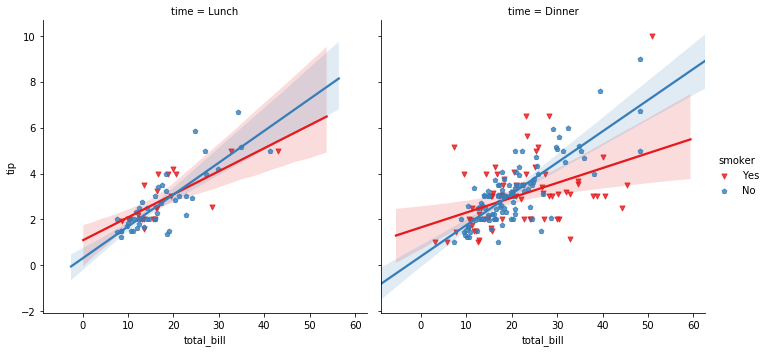

In [21]:
# https://python-graph-gallery.com/41-control-marker-features/ 
# https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-4-9b0119887130
# http://alanpryorjr.com/visualizations/seaborn/lmplot/lmplot/
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker", scatter_kws={"s": 25, 'alpha':0.8}, markers=['v', 'p'], data=tips, palette="Set1");

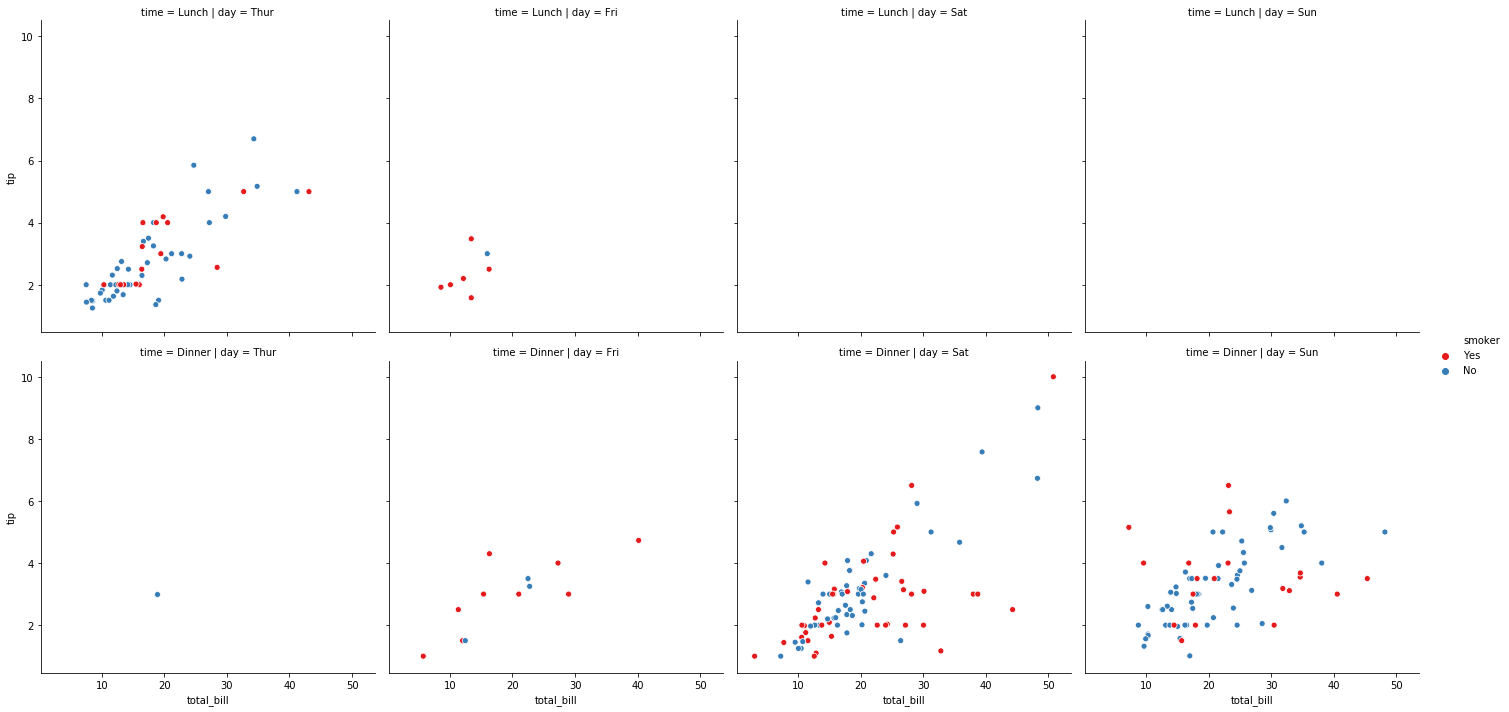

In [22]:
sns.relplot(x="total_bill", y="tip", col="day", row="time", hue="smoker", marker='o', data=tips, palette="Set1")

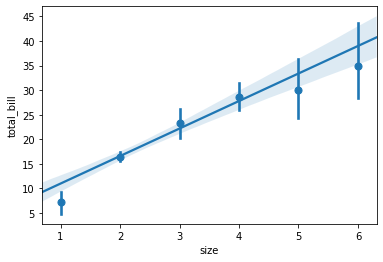

In [23]:
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(x="size", y="total_bill", data=tips, x_estimator=np.mean)

Two plots side by side

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


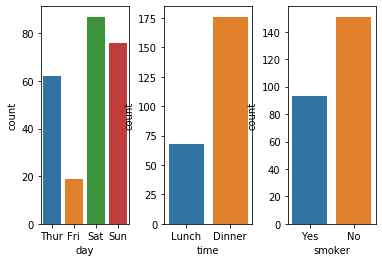

In [38]:
# adapted from: https://stackoverflow.com/a/43131357
fig, ax = plt.subplots(1,3)
plt.subplots_adjust(hspace=0.9, wspace=0.4)
sns.countplot(tips['day'], ax=ax[0])
sns.countplot(tips['time'], ax=ax[1])
sns.countplot(tips['smoker'], ax=ax[2])
fig.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

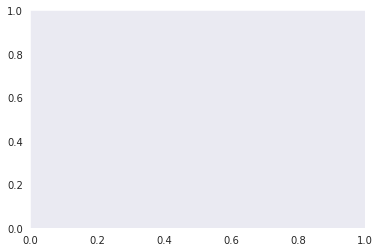

In [82]:
# adapted from https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/

df = tips["day"]
sns.distplot(df, kde=False, label='Thursday')

#df = tips[tips["day"] == "Thur"]
#sns.distplot(df, kde=False, label='Thursday')

#df = tips[tips["day"] == "Fri"]
#sns.distplot(df, kde=False, label='Friday')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Tips per day')
plt.xlabel('Tip')
plt.ylabel('Density')

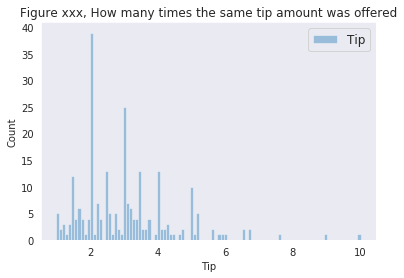

In [104]:
sns.distplot(tips['tip'], bins=100, kde=False, label="Tip")
plt.legend(prop={'size': 12})
plt.title('Figure xxx, How many times the same tip amount was offered')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

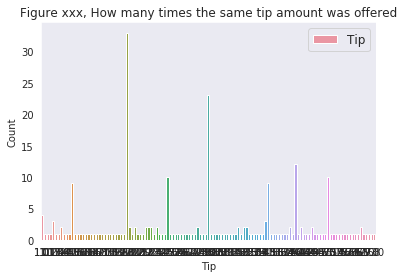

In [105]:
sns.countplot(tips['tip'], label="Tip")
plt.legend(prop={'size': 12})
plt.title('Figure xxx, How many times the same tip amount was offered')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

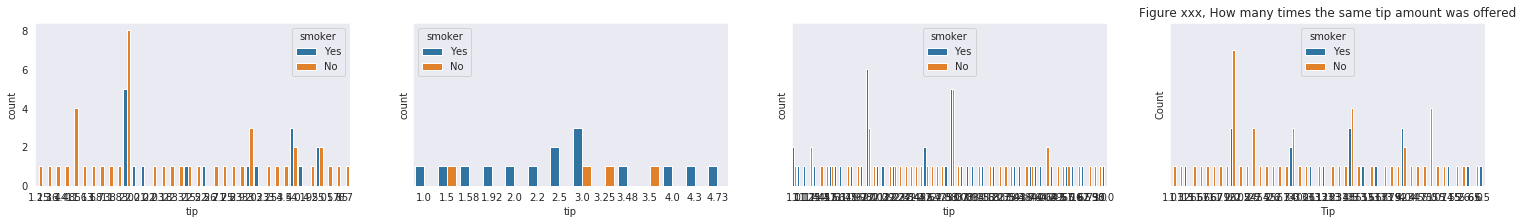

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [122]:
fig, ax = plt.subplots(ncols=4, figsize=(26,3), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plot #1 - Thur
sns.countplot(x="tip", hue="smoker", data=tips[tips["day"] == "Thur"], ax=ax[0])
# plot #2 - Fri
sns.countplot(x="tip", hue="smoker", data=tips[tips["day"] == "Fri"], ax=ax[1])
# plot #3 - Sat
sns.countplot(x="tip", hue="smoker", data=tips[tips["day"] == "Sat"], ax=ax[2])
# plot #4 - Sun
sns.countplot(x="tip", hue="smoker", data=tips[tips["day"] == "Sun"], ax=ax[3])


#plt.legend(prop={'size': 12})
plt.title('Figure xxx, How many times the same tip amount was offered')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

fig.show()

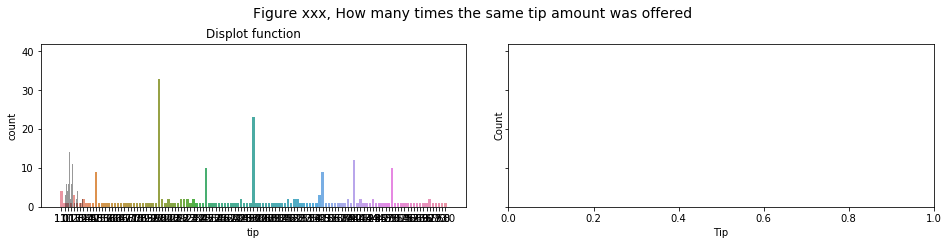

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(16,3), sharey=True)
plt.suptitle('Figure xxx, How many times the same tip amount was offered', x=0.5, y=1.05, fontsize = 14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)

# plot #1 - 
sns.countplot(tips['tip'], label="Tip", ax=ax[0])
ax[0].set_title('Countplot function')

# plot #2 - 
sns.distplot(tips['tip'], bins=90, kde=False, label="Tip", color="k", ax=ax[1])
ax[1].set_title('Displot function')

#plt.title('Figure xxx, How many times the same tip amount was offered')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

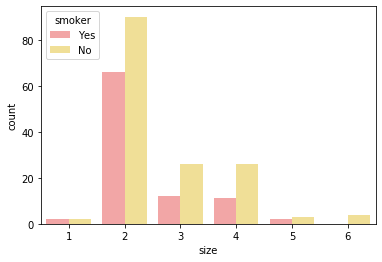

In [18]:
# from https://jovianlin.io/data-visualization-seaborn-part-2/
sns.countplot(data=tips, x="size", hue="smoker", palette={"Yes": "#FF9999", "No": "#FFE888"})

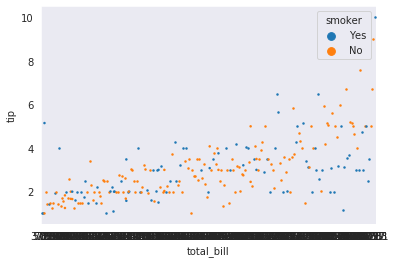

In [47]:
sns.swarmplot(x="total_bill", y="tip", hue="smoker", marker='.', data=tips[])

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


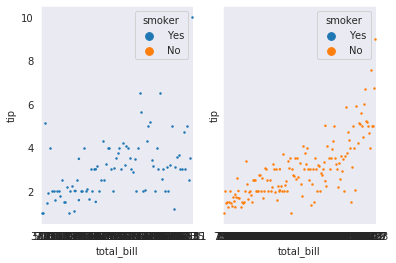

In [67]:
fig, ax = plt.subplots(ncols=2, sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plot #1 - Smokers
sns.swarmplot(x="total_bill", y="tip", hue="smoker", marker='.', data=tips[tips["smoker"] == "Yes"], ax=ax[0])
# plot #2 - Non-smokers
sns.swarmplot(x="total_bill", y="tip", hue="smoker", marker='.', data=tips[tips["smoker"] == "No"], ax=ax[1])

fig.show()

/home/ak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


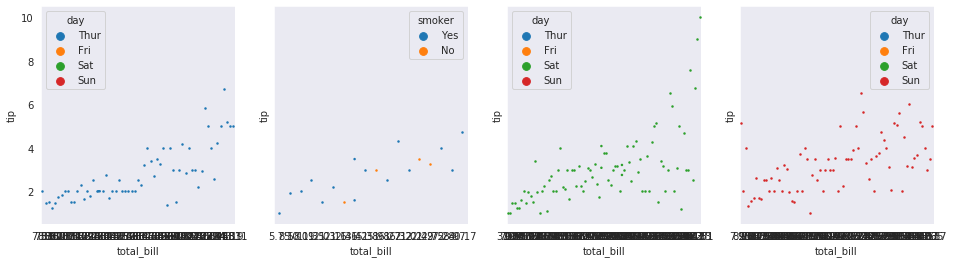

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(16,4), sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# plot #1 - Thur
sns.swarmplot(x="total_bill", y="tip", hue="day", marker='.', data=tips[tips["day"] == "Thur"], ax=ax[0])
# plot #2 - Fri
sns.swarmplot(x="total_bill", y="tip", hue="smoker", marker='.', data=tips[tips["day"] == "Fri"], ax=ax[1])
# plot #3 - Sat
sns.swarmplot(x="total_bill", y="tip", hue="day", marker='.', data=tips[tips["day"] == "Sat"], ax=ax[2])
# plot #4 - Sun
sns.swarmplot(x="total_bill", y="tip", hue="day", marker='.', data=tips[tips["day"] == "Sun"], ax=ax[3])

fig.show()

## k-nearest neighbors algorithm
Based on the Programming for Data Analysis, GMIT, lecture videos and [Notebook](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/raw/master/pandas-with-iris.ipynb).  
Other references:  
[Machine Learning Basics with the K-Nearest Neighbors Algorithm](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)  
[K-Nearest Neighbors Algorithm Using Python](https://www.edureka.co/blog/k-nearest-neighbors-algorithm/)

### Importing SciKit Learn Library

In [ ]:
import sklearn.neighbors as nei
import sklearn.model_selection as mod

In [ ]:
tips.head(2) # shape reminder: (244, 7)

#### A glimpse into plot.  
The below plot - relationship between tip size, total bill and the sex - is deemed the most suitable for the algorithm application. The other variables produce more fuzzy plots (a lot of overlapping data points).

In [ ]:
sns.pairplot(tips, hue="sex") 

#### Inputs and Outputs

In [ ]:
inputs = tips[['total_bill', 'tip']]
outputs = tips['sex']

#### Classifier

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5) # will consider 5 nearest neighbours

#### Fit function

In [ ]:
knn.fit(inputs, outputs)

#### Evaluate

In [ ]:
(knn.predict(inputs) == outputs).sum() # Returns number of correctly recognised samples; total number of samples is 244

#### Training and testing data sub-sets
Splitting the dataset randomly into:  
1) training (75% of entire dataset size, i.e. 183), and  
2) testing (25%, i.e. 61)

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.25)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

In [ ]:
# knn.predict(inputs_test) == outputs_test

In [ ]:
answer = (knn.predict(inputs_test) == outputs_test).sum()
answer

#### Accuracy

Ratio of correctly recognised to actual number

In [ ]:
(answer/61) * 100

## plots

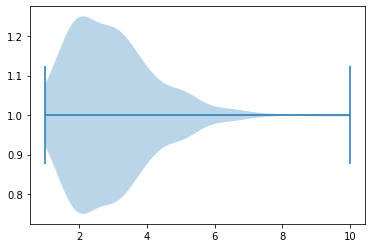

In [40]:
plt.violinplot(tips["tip"], vert=False) # adapted from https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
plt.show()

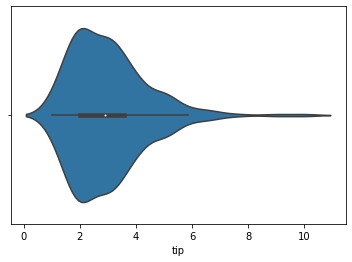

In [41]:
sns.violinplot(x = "tip", data=tips) # adapted from https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
plt.show()

## histograms

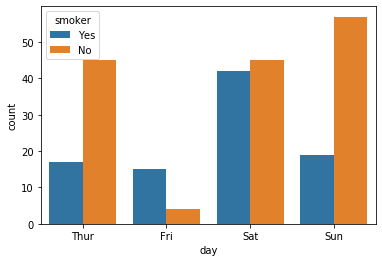

In [42]:
#d = tips.loc[:, 'day']
#sns.distplot(tips['day'])
sns.countplot(x="day", hue='smoker', data=tips)

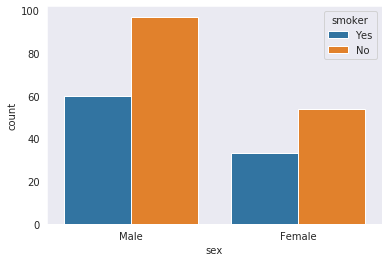

In [43]:
sns.set_style("dark")
#sns.set_style("ticks")
# sns.set_context("paper") # small print, detailed scale

sns.countplot(x="sex", hue='smoker', data=tips)

/home/ak/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


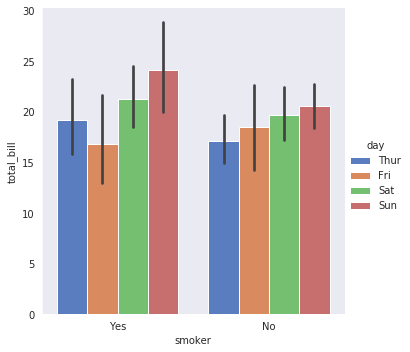

In [44]:
# help(sns.factorplot)
sns.factorplot("smoker", "total_bill", "day", kind="bar", palette="muted", data=tips)
plt.show()

### 2. Regression

In this section I will look at the initial hypothesis, that is: **What is the relationship (if any) between total bill and amount of tips**.

#### Total bill vs tips

Note: there seems to me no implication of the `time` (lunch and dinner) with respect to the relationship between total bill and tip. See below plot, where both _lunch_ and _dinner_ times seem to be uniformly distributed. Therefore, **this category will not be considered** in further analysis.

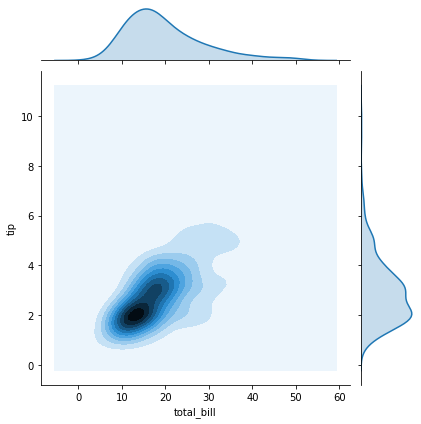

In [3]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde");

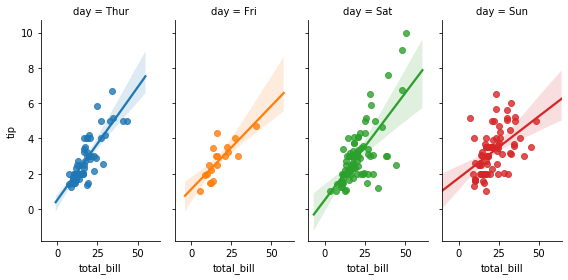

In [4]:
sns.lmplot(x="total_bill", y="tip", hue="day", col="day", data=tips, height=4, aspect=.5)

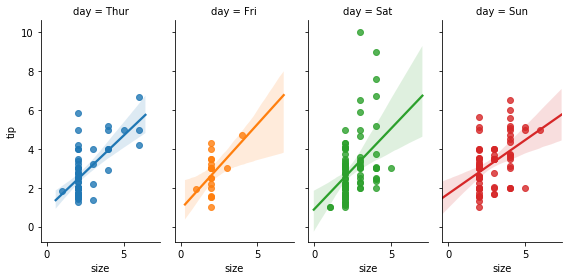

In [5]:
sns.lmplot(x="size", y="tip", hue="day", col="day", data=tips, height=4, aspect=.5, x_jitter=0)

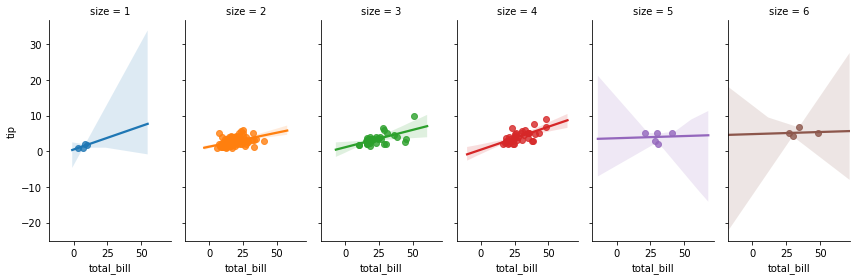

In [6]:
sns.lmplot(x="total_bill", y="tip", hue="size", col="size", data=tips, height=4, aspect=.5, x_jitter=0)

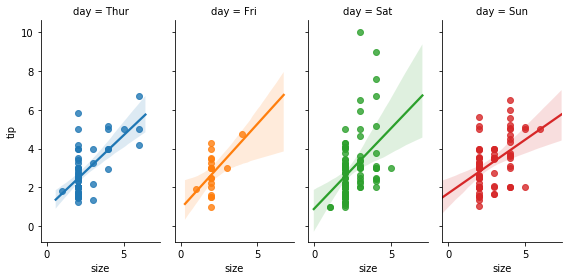

In [7]:
sns.lmplot(x="size", y="tip", hue="day", col="day", data=tips, height=4, aspect=.5, x_jitter=0)

In [1]:
# from http://www.kleerekoper.co.uk/2017/01/add-equation-to-seaborn-plot-and.html
x = 10000 * np.random.rand(50)
y = x - 500 + 500*rng.randn(50)

fig1 = sns.scatterplot(x, y)


datafr = pd.DataFrame({'x':x,'y':y})

fig2 = sns.lmplot('x','y',datafr,fit_reg=True,aspect=1.5,ci=None,scatter_kws={"s": 50})


#Finding the Equation of the Line
#Adding the line of the equation requires us to first find the parameters of the line. We can use scikit-learn to do this:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)
regr.fit(X, y)
print(regr.coef_[0])
print(regr.intercept_)

#This gives: (Your values might vary because of the initial random number)

[ 1.01360441]
[-499.28854278]

#To include that in the plot we have to overlap a textbox on the plot:
fig3 = sns.lmplot('x','y',datafr,fit_reg=True,aspect=1.5,ci=None, scatter_kws={"s": 50})
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = '$y=-499.3 + 1.0x$'

#You can, of course, place the box in whichever position you like:
fig3.ax.text(0.1, 0.9, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)

NameError: name 'np' is not defined